New red QSO Code

In [19]:
#imports placed here
import os
import pickle 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scripts import rgbImageGenerator
import glob
import shutil

colour datapoints: 138
G values: 139,R values: 143,I values: 145
Average chi 2 values:
G values: 1.465695705680069,R values: 1.7099122098922461,I values: 3.7378813886563327
chi std
G values: 1.296705604163243,R values: 1.9135379411620457,I values: 11.264995857954064
The mean reduced chi squared is 1.601 with a standard deviation 0.66
The median reduced chi squared is 1.553
object list with reduced chi square value above 2:
14 g band objects with reduced chi square values over 2
16 r band objects with reduced chi square values over 2
37 i band objects with reduced chi square values over 2
0.0 4.02


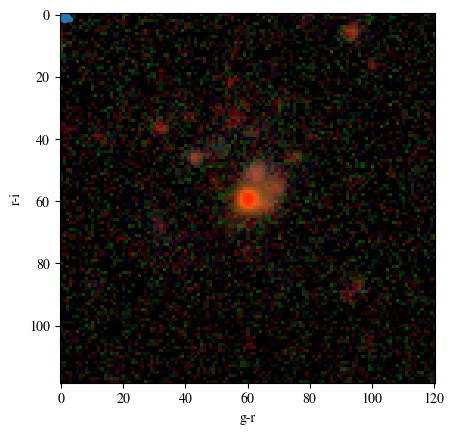

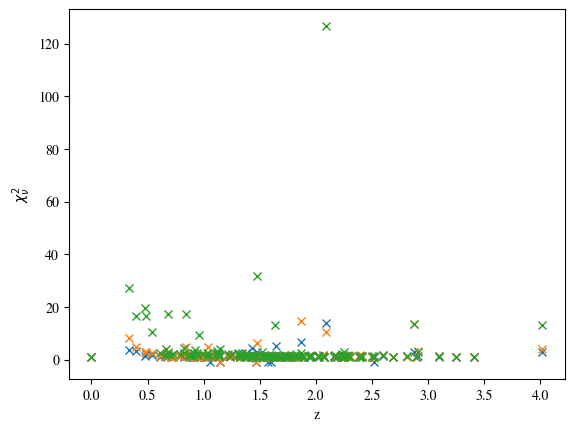

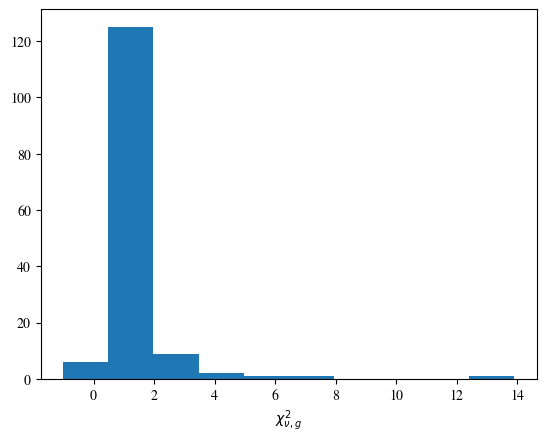

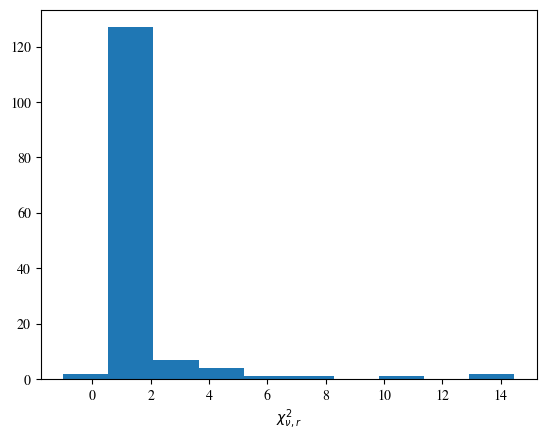

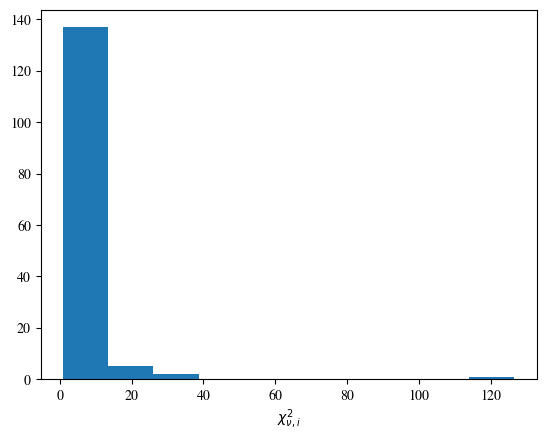

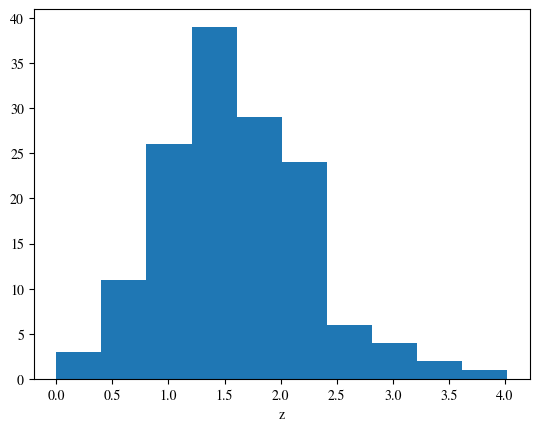

In [18]:
#Here we will inspect the contents of the pickle files for fits which exclude the host component
#first get a list of directory contents and catalogue:
fileAddress = "results/cut50/excludinghost"
catalogue = pd.read_csv("data/RedQSOCatalogue.csv")

files = list(os.listdir(fileAddress))
reducedChiSquareds = {"G":[],"R":[],"I":[]}
highChiSquareObjects = {"G":[],"R":[],"I":[]}
magnitudes = {"G":[],"R":[],"I":[]}
Zs = []
for file in files:
    #check that the file is a directory:
    if "." in file:
        continue
    pklFiles = glob.glob(f"{fileAddress}/{file}/fitting_results/*.pkl")
    if len(pklFiles) == 0:
        print(f"No .pkl files found for {file}")
        continue 
    obj_No = list(catalogue["TARGETID"]).index(int(file))
    z = list(catalogue["Z"])[obj_No]
    Zs.append(z)
    bandsForObject = ""
    for pickleFile in pklFiles:
        bandsForObject += f"{pickleFile[-5]}"
        output = pickle.load(open(pickleFile,"rb"))
        #print(output.final_result_ps)
        #print(output.reduced_Chisq)
        magnitudes[pickleFile[-5].upper()].append(output.final_result_ps[0]["magnitude"])
        reducedChiSquareds[pickleFile[-5].upper()].append(output.reduced_Chisq)
        if output.reduced_Chisq >= 2:
            highChiSquareObjects[pickleFile[-5].upper()].append(file)
        
    for band in ["g","r","i"]:
        if band not in bandsForObject:
            reducedChiSquareds[band.upper()].append(-1) #appending invalid value to represent missing data
            magnitudes[band.upper()].append(-1)
#colour statistics

GRColour = []
RIColour = []
#want g-r colour and r-i colour from set with complete results
for i, j in enumerate(magnitudes["G"]):
    #check that all bands have valid data
    if -1 in [magnitudes["G"][i],magnitudes["R"][i],magnitudes["I"][i]]:
        #ignore this index if -1 is in this gri set
        continue
    GRColour.append(magnitudes["G"][i] - magnitudes["R"][i])
    RIColour.append(magnitudes["R"][i] - magnitudes["I"][i])
print(f"colour datapoints: {len(GRColour)}")

#Counting
#G, R, I number of results, average chi2
ValidOutputs = {"G":[mag for mag in magnitudes["G"] if mag != -1],
                "R":[mag for mag in magnitudes["R"] if mag != -1],
                "I":[mag for mag in magnitudes["I"] if mag != -1]}
ValidOutputsChi = {"G":[chi for chi in reducedChiSquareds["G"] if chi != -1],
                "R":[chi for chi in reducedChiSquareds["R"] if chi != -1],
                "I":[chi for chi in reducedChiSquareds["I"] if chi != -1]}
print(f"G values: {len(ValidOutputs["G"])},R values: {len(ValidOutputs["R"])},I values: {len(ValidOutputs["I"])}")
print("Average chi 2 values:")
print(f"G values: {np.mean(ValidOutputsChi["G"])},R values: {np.mean(ValidOutputsChi["R"])},I values: {np.mean(ValidOutputsChi["I"])}")
print("chi std")
print(f"G values: {np.std(ValidOutputsChi["G"])},R values: {np.std(ValidOutputsChi["R"])},I values: {np.std(ValidOutputsChi["I"])}")
#plt.ylim(top=2,bottom=-1)
plt.plot(GRColour,RIColour,linestyle="None",marker=".")
plt.xlabel("g-r")
plt.ylabel("r-i")
#chi2 statistics
print(f"The mean reduced chi squared is {round(np.mean(Zs),3)} with a standard deviation {round(np.std(Zs),3)}")
print(f"The median reduced chi squared is {round(np.median(Zs),3)}")
print("object list with reduced chi square value above 2:")
#print(highChiSquareObjects)
rgbImageGenerator.generateImages(highChiSquareObjects["I"],r"rgbimages/highChiSquare",r"data/images") #image generation of high chi square objects
print(f"{len(highChiSquareObjects["G"])} g band objects with reduced chi square values over 2")
print(f"{len(highChiSquareObjects["R"])} r band objects with reduced chi square values over 2")
print(f"{len(highChiSquareObjects["I"])} i band objects with reduced chi square values over 2")
#displaying plots:
plt.figure()
plt.plot(Zs,reducedChiSquareds["G"],linestyle="None",marker="x",label="g")
plt.plot(Zs,reducedChiSquareds["R"],linestyle="None",marker="x",label="r")
plt.plot(Zs,reducedChiSquareds["I"],linestyle="None",marker="x",label="i")
plt.xlabel("z")
plt.ylabel(r"$\chi^{2}_{\nu}$")
plt.figure()
plt.xlabel(r"$\chi^{2}_{\nu, g}$")
plt.hist(reducedChiSquareds["G"])
plt.figure()
plt.xlabel(r"$\chi^{2}_{\nu, r}$")
plt.hist(reducedChiSquareds["R"])
plt.figure()
plt.xlabel(r"$\chi^{2}_{\nu, i}$")
plt.hist(reducedChiSquareds["I"])
plt.figure()
plt.hist(Zs)
plt.xlabel("z")
print(f"{min(Zs)} {max(Zs)}")

In [26]:
#Want to collect final plots for high chi 2 outputs
outputDirectory = r"results/cut50/excludinghost"
files = list(os.listdir(outputDirectory))
for file in files:
    if file in highChiSquareObjects["G"]:
        shutil.copyfile(f"{outputDirectory}/{file}/fitting_results/{file}-result-band-g_qso_final_plot.pdf",f"plots/GBand/{file}-result-band-g_qso_final_plot.pdf")
    if file in highChiSquareObjects["R"]:
        shutil.copyfile(f"{outputDirectory}/{file}/fitting_results/{file}-result-band-r_qso_final_plot.pdf",f"plots/RBand/{file}-result-band-r_qso_final_plot.pdf")
    if file in highChiSquareObjects["I"]:
        shutil.copyfile(f"{outputDirectory}/{file}/fitting_results/{file}-result-band-i_qso_final_plot.pdf",f"plots/IBand/{file}-result-band-i_qso_final_plot.pdf")
    else:
        continue